<a href="https://colab.research.google.com/github/dmachlanski/ncrm-causality-2021/blob/main/labs/day_1/Tutorial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression - tutorial

This is a guided example that involves a regression problem - [abalone](https://archive.ics.uci.edu/ml/datasets/abalone) dataset.

## The plan
1. Import necessary packages.
2. Load and explore the dataset.
3. Perform data pre-processing (transformations, scaling, splitting).
4. Train and evaluate the models.
5. Hyperparameter optimisation.

## Step 1 - packages

In [24]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")
import utils as ut

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## Step 2 - data

More information about the covariates:

| Name           | Data Type  | Measurement Unit | Description                 |
|----------------|------------|------------------|-----------------------------|
| Sex            | nominal    | -                | M, F, and I (infant)        |
| Length         | continuous | mm               | longest shell measurement   |
| Diameter       | continuous | mm               | perpendicular to length     |
| Height         | continuous | mm               | with meat in shell          |
| Whole weight   | continuous | grams            | whole abalone               |
| Shucked weight | continuous | grams            | weight of meat              |
| Viscera weight | continuous | grams            | gut weight (after bleeding) |
| Shell weight   | continuous | grams            | after being dried           |
| Rings          | integer    | -                | +1.5 gives the age in years |

In [25]:
df_data = pd.read_csv('https://raw.githubusercontent.com/misoc-mml/ncrm-causality-2022/main/labs/part_1/data/abalone.csv')

In [26]:
df_data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


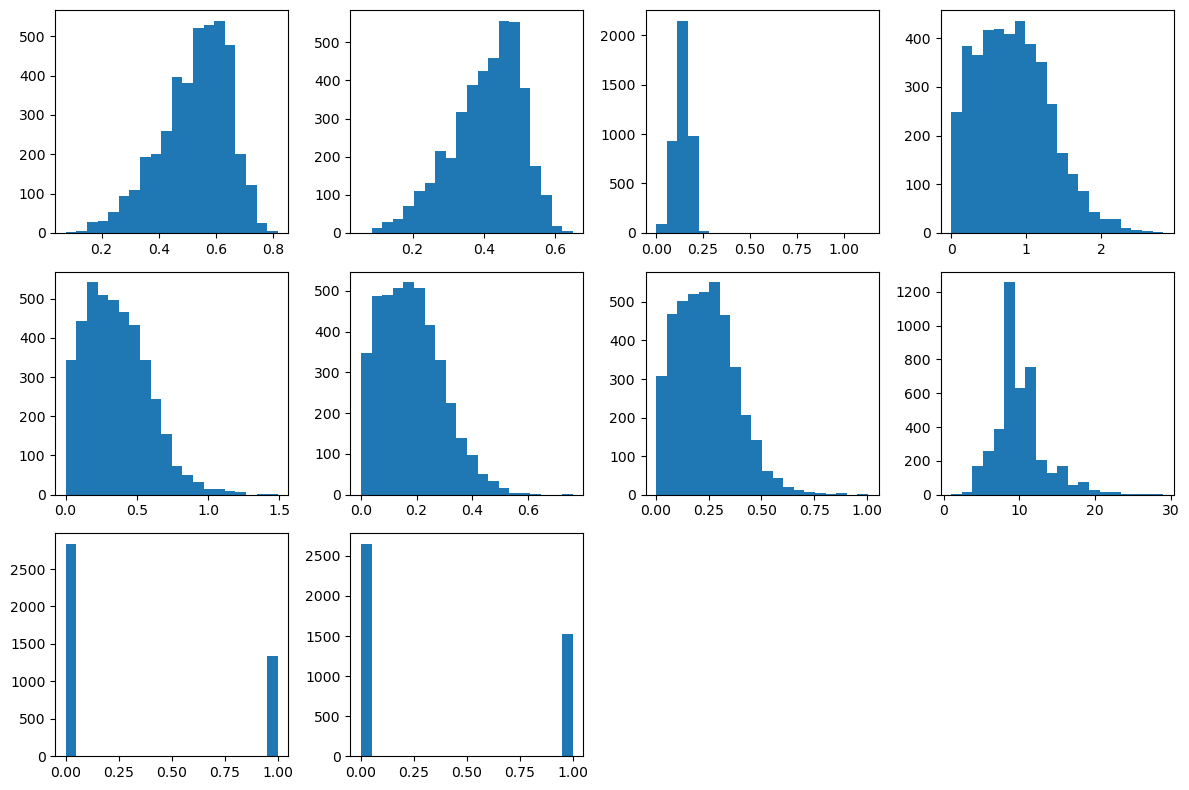

In [29]:
ut.plot_dist(df_data.to_numpy(), 20, (12, 8))

## Step 3 - data pre-processing

1. Separate background covariates (X) from the target (y).
2. Split into training and testing data.
3. Scale the data.

In [30]:
X = df_data.drop(columns=['rings']).to_numpy()
y = df_data['rings'].to_numpy()

In [31]:
print(X.shape)
print(y.shape)

(4177, 9)
(4177,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler_x = MinMaxScaler()

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)

X_test = scaler_x.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3341, 9)
(3341,)
(836, 9)
(836,)


## Step 4 - train the models

1. Dummy model (sanity check).
2. Linear regression.
3. Decision tree.
4. Random forest.

For each of the above, we do the following:
1. Fit the model on the training data (X and y).
2. Make predictions for the test data (X).
3. Compare obtained predictions to the ground truth (y).

We will use the Mean Squared Error (MSE) metric to evaluate our models' performance.

$$MSE = \frac{1}{n} \sum \limits_{i=1}^{n}(y_i - \hat{y}_i)^2$$

In [33]:
dr = DummyRegressor()
dr.fit(X_train, y_train)

y_pred_test = dr.predict(X_test)

dr_mse_test = mean_squared_error(y_test, y_pred_test)

print(dr_mse_test)

8.700504884801655


In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

lr_mse_test = mean_squared_error(y_test, y_pred_test)

print(lr_mse_test)

4.245031665739695


In [63]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)

dt_mse_test = mean_squared_error(y_test, y_pred_test)

print(dt_mse_test)

4.7211267989882675


In [74]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train.flatten())

y_pred_test = rf.predict(X_test)

rf_mse_test = mean_squared_error(y_test, y_pred_test)

print(rf_mse_test)

4.181809260241781


Compare all obtained results to each other

In [75]:
print(f'Dummy: {dr_mse_test:.3f}')
print(f'LR: {lr_mse_test:.3f}')
print(f'DT: {dt_mse_test:.3f}')
print(f'RF: {rf_mse_test:.3f}')

Dummy: 8.701
LR: 4.245
DT: 4.721
RF: 4.182
